# Calculs avec numpy et tracé avec matplotlib

In [1]:
import numpy as np

#               f        abs(H)  arg(H)
M = np.array([ [200.0,   0.970,  -8.90],
               [400.0,   0.950,  -17.0],
               [800.0,   0.840,  -30.0],
               [1000.0,  0.790,  -35.0],
               [1200.0,  0.740,  -40.0],
               [1400.0,  0.680,  -47.0],
               [1500.0,  0.660,  -48.5],
               [1600.0,  0.650,  -51.0],
               [1800.0,  0.592,  -53.0],
               [2000.0,  0.560,  -56.0],
               [10000.0, 0.160,  -80.0],
               [20000.0, 0.067,  -84.0],
               [50000.0, 0.028,  -86.0]])
f = M[:,0]
H = M[:,1]*np.exp(1j*np.pi*M[:,2]/180.0)
Gdb = 20.0*np.log10(np.abs(H))

In [2]:
import matplotlib
matplotlib.use('nbagg')

<IPython.core.display.Javascript object>


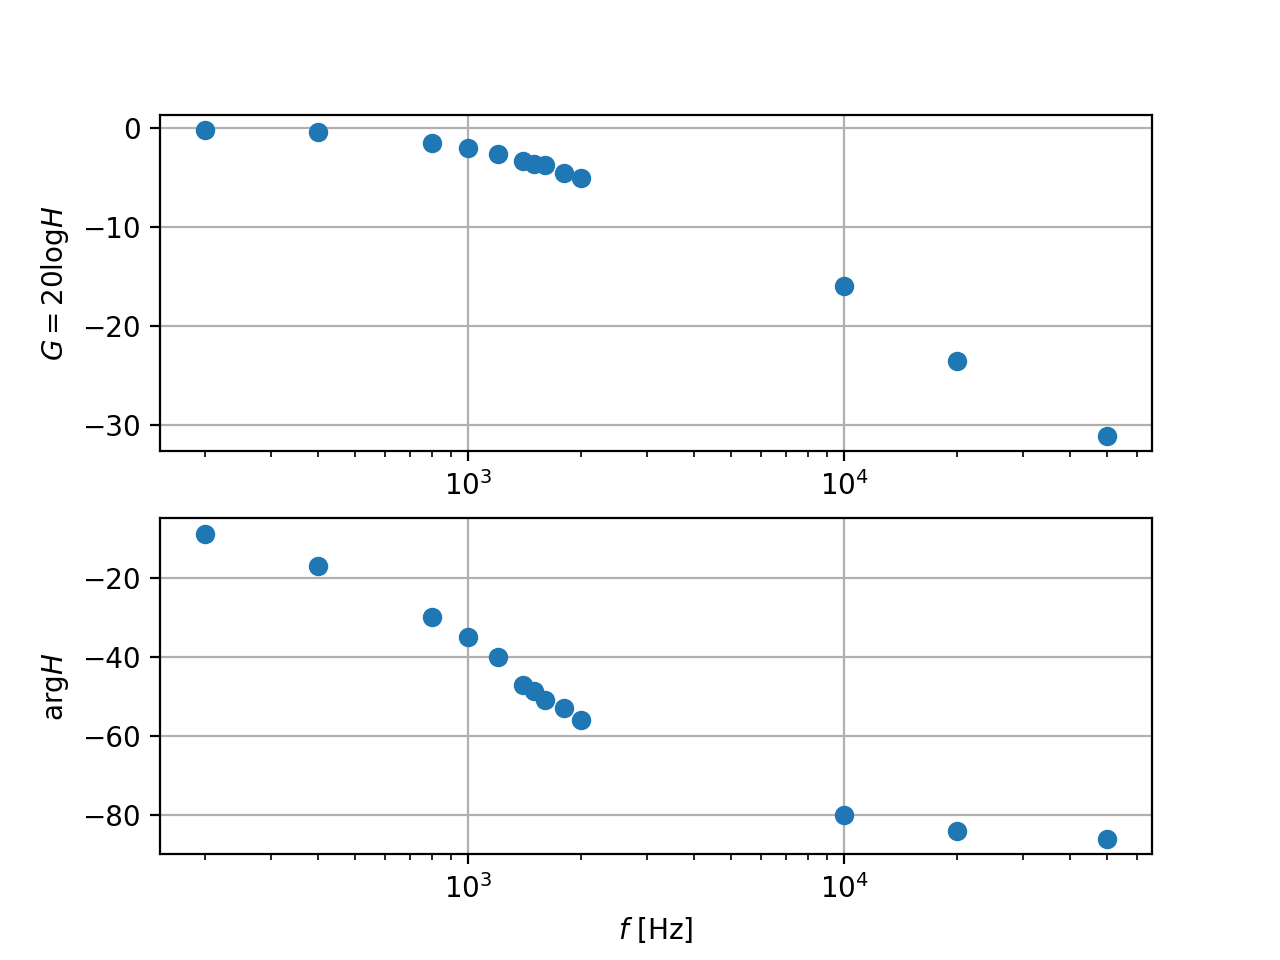

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(2,1,1)
plt.semilogx(f, Gdb, 'o')
plt.ylabel(r'$G = 20\log{H}$')
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(f, np.angle(H)*180.0/np.pi, 'o')
plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'$\arg{H}$')
plt.grid()
plt.show()

# Fit de la pente

In [4]:
p = np.polyfit(np.log10(f[-3:]), Gdb[-3:], deg=1)
# résultat: p[0]*x + p[1]
print(p[0], 'dB/decade')

-21.5225976347 dB/decade


# Recherche de la coupure à -3 dB

In [5]:
ind = np.argsort(Gdb)
f0 = np.interp(-3.0, Gdb[ind], f[ind])
print('f0 =', f0, 'Hz')

f0 = 1304.7399220763268 Hz


In [6]:
f_th = np.logspace(2, 5, 100)
H_th = 1.0/(1.0+1j*f_th/f0)

<IPython.core.display.Javascript object>


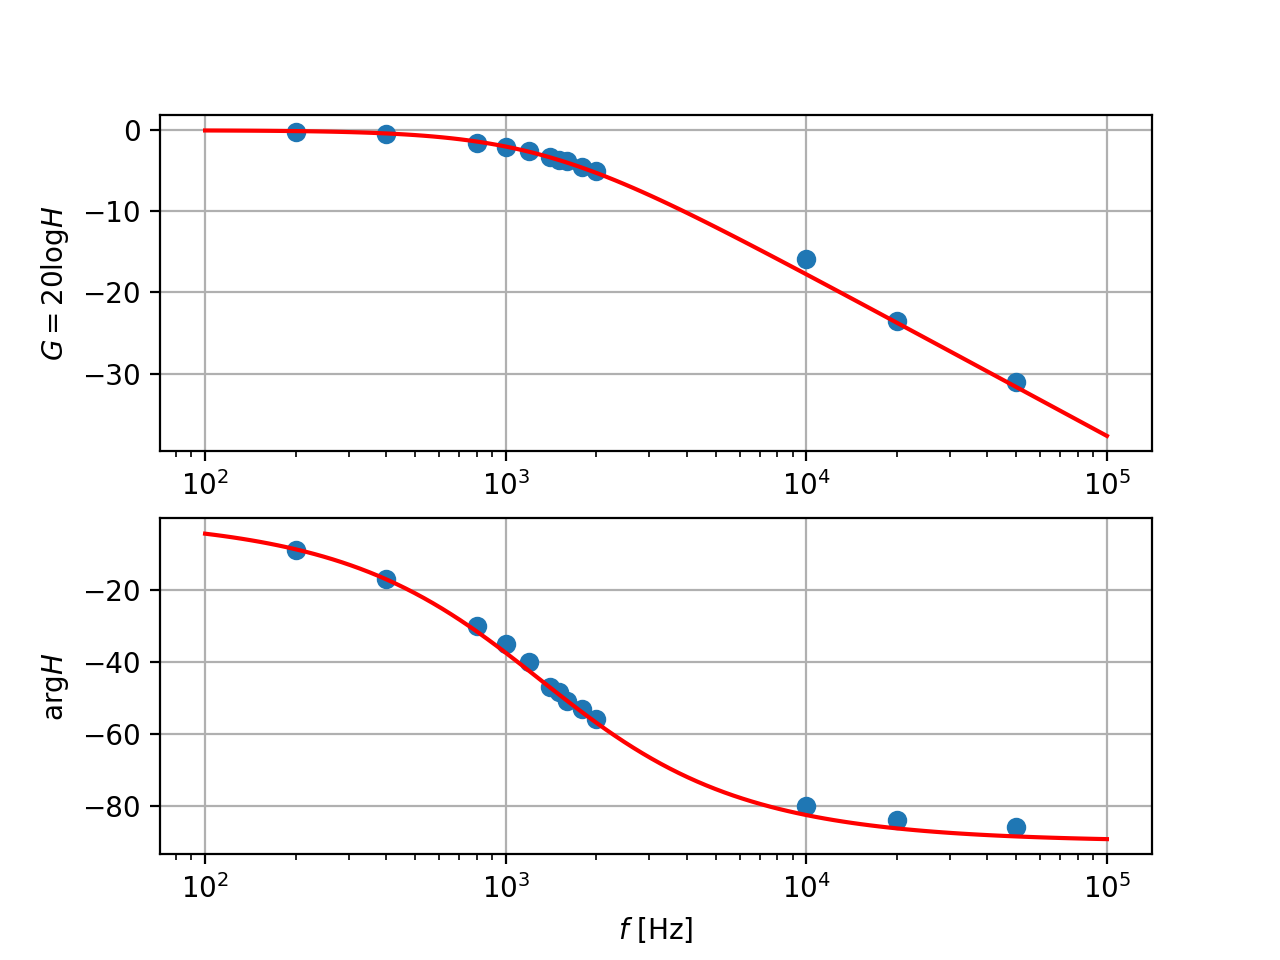

In [7]:
plt.figure()
plt.subplot(2,1,1)
plt.semilogx(f, Gdb, 'o')
plt.semilogx(f_th, 20.0*np.log10(np.abs(H_th)), 'r-')
plt.ylabel(r'$G = 20\log{H}$')
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(f, np.angle(H)*180.0/np.pi, 'o')
plt.semilogx(f_th, np.angle(H_th)*180.0/np.pi, 'r-')
plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'$\arg{H}$')
plt.grid()
plt.savefig('Bode.pdf')
plt.show()